In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from  statsmodels.datasets import sunspots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [41]:
data = sunspots.load_pandas().data
series = data['SUNACTIVITY'][:-50]
orseries = data["SUNACTIVITY"][-50:]
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


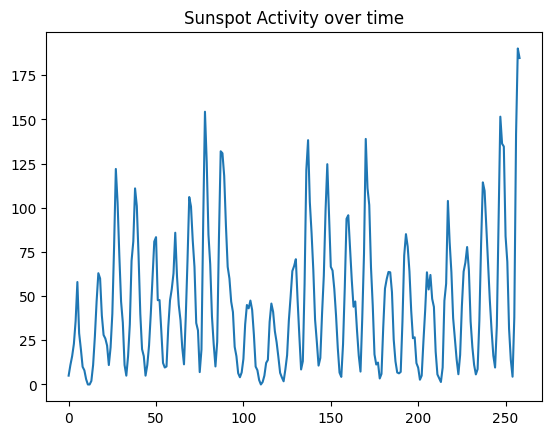

In [35]:
plt.figure()
plt.plot(series)
plt.title("Sunspot Activity over time")
plt.show()

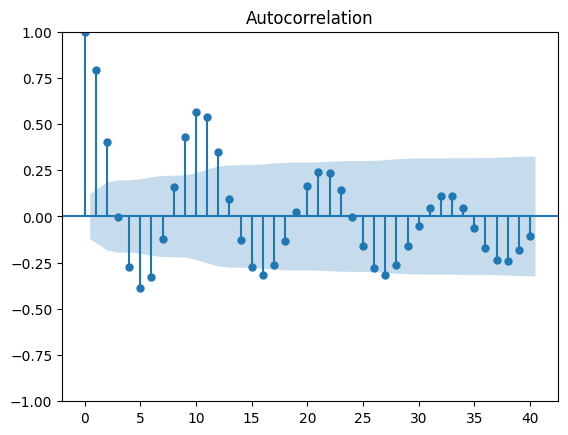

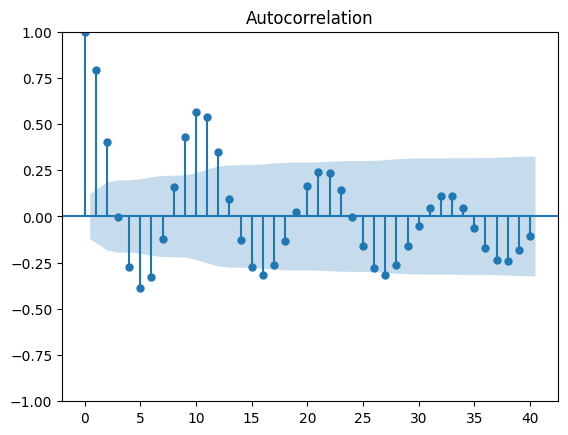

In [36]:
plot_acf(series, lags = 40)

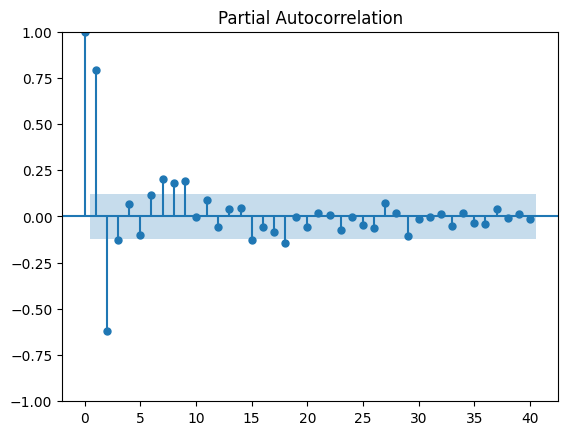

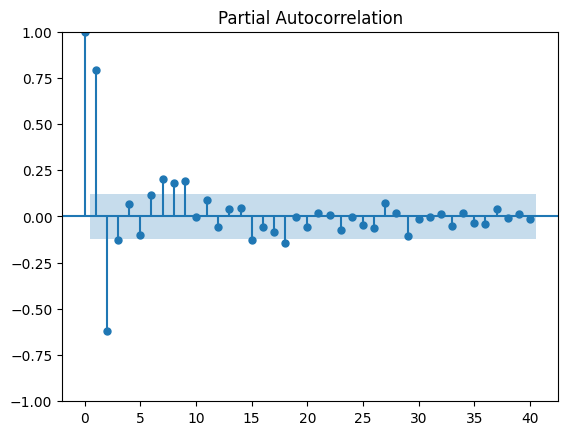

In [37]:
plot_pacf(series, lags = 40)

In [46]:
model = AutoReg(series, lags = 3)
model_fit = model.fit()

In [39]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:            SUNACTIVITY   No. Observations:                  259
Model:                     AutoReg(9)   Log Likelihood               -1023.896
Method:               Conditional MLE   S.D. of innovations             14.536
Date:                Mon, 16 Feb 2026   AIC                           2069.792
Time:                        22:45:33   BIC                           2108.528
Sample:                             9   HQIC                          2085.382
                                  259                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.5159      2.681      2.430      0.015       1.261      11.771
SUNACTIVITY.L1     1.2106      0.062     19.404      0.000       1.088       1.333
SUNACTIVITY.L2    -0.4572      0.099

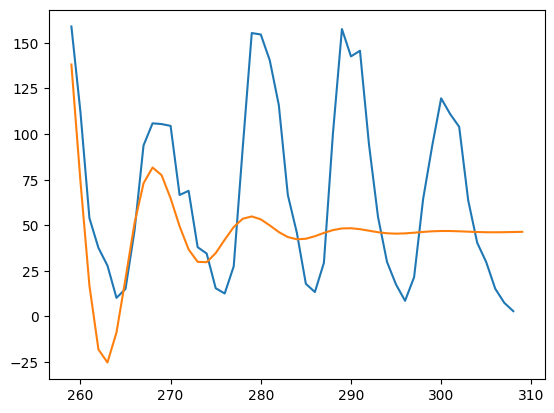

In [47]:
predictions = model_fit.predict(start = len(series), end = len(series)+50)
plt.figure()
plt.plot(orseries, label = "Original")
plt.plot(predictions, label = "predicted")
plt.show()